## Project Name:  Analysis of Online Shoppers Purchase Intention
## Project Team:  Ashiat Adeogun, Sunita Pandey, Damilare Ogungbesan
## Cohort:  DA A20

## Section 01:Data cleaning and Exploratory Data Analysis
Must have:

1. Explore dataset features?
2. Create new features if needed?
3. Are there any null values or outliers, replacing NaN values if needed?

## Section 02: Statistical Analysis

1. Compute some statistics

## Section 03: Data Visualization
Good to have:

1. Please plot and visualize
2. Create static and dynamic visualization to tell a story
3. Dashboard: Make a dashboard with Dash library (or Sreamlit library)
Comment on each step, tell a story, the notebook should be a report

## Section 04: Machine learning

2. Machine Learning Model: Choose a target column of the dataset,
3. split the dataset between training data and test data, and trai
n a simple machine learning model

## Column Descriptions:
1. Administrative: This is the number of pages of this type (administrative) that the user visited.
2. Administrative_Duration: This is the amount of time spent on administrative page.
3. Informational: This is the number of pages of this type (informational) that the user visited.
4. Informational_Duration: This is the amount of time spent on informational page.
5. ProductRelated: This is the number of pages of this type (product related) that the user visited.
6. ProductRelated_Duration: This is the amount of time spent on Product Related page.
7. BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
8. ExitRates: The percentage of pageviews on the website that end at that specific page.
9. PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.More information about how this is calculated
10. SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
11. Month: Contains the month the pageview occurred, in string form.
12. OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
13. Browser: An integer value representing the browser that the user was using to view the page.
14. Region: An integer value representing which region the user is located in.
15. TrafficType: An integer value representing what type of traffic the user is categorized into.
16. VisitorType: A string representing whether a visitor is a New Visitor, Returning Visitor, or Other.
17. Weekend: A boolean representing whether the session is on a weekend or not.
18. Revenue: A boolean representing whether or not the user completed the purchase.



In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
print(f'No. of Observations in the dataset: {df.shape[0]}\nNo. of features in the dataset: {df.shape[1]}')

No. of Observations in the dataset: 12330
No. of features in the dataset: 18


In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
#Checking infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Observation:
 There are 10 numeric variables and 8 categorical variables in the data set

In [5]:
#Converting the data types as required
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')


#Replacing the Revenue row values from True ,False 
df['Revenue'] =df['Revenue'].replace({True:'Buy',False:'NotBuy'})
df['Weekend'] =df['Weekend'].replace({True:'Yes',False:'No'})

#Renaming the column
df = df.rename(columns=({'Informational':'Informational_Visited'}))
df = df.rename(columns=({'ProductRelated':'ProductRelated_Visited'}))
df = df.rename(columns=({'Administrative':'Administrative_Visited'}))

In [6]:
#Checking the statistical information of the data set
df.describe()

,Administrative_Visited,Administrative_Duration,Informational_Visited,Informational_Duration,ProductRelated_Visited,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [7]:
#Checking the missing_value in percentage
missing_percentage = df.isnull().sum()/df.shape[0]
print(missing_percentage)

Administrative_Visited     0.0
Administrative_Duration    0.0
Informational_Visited      0.0
Informational_Duration     0.0
ProductRelated_Visited     0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


### Observation: 
There are no missing values in the data set

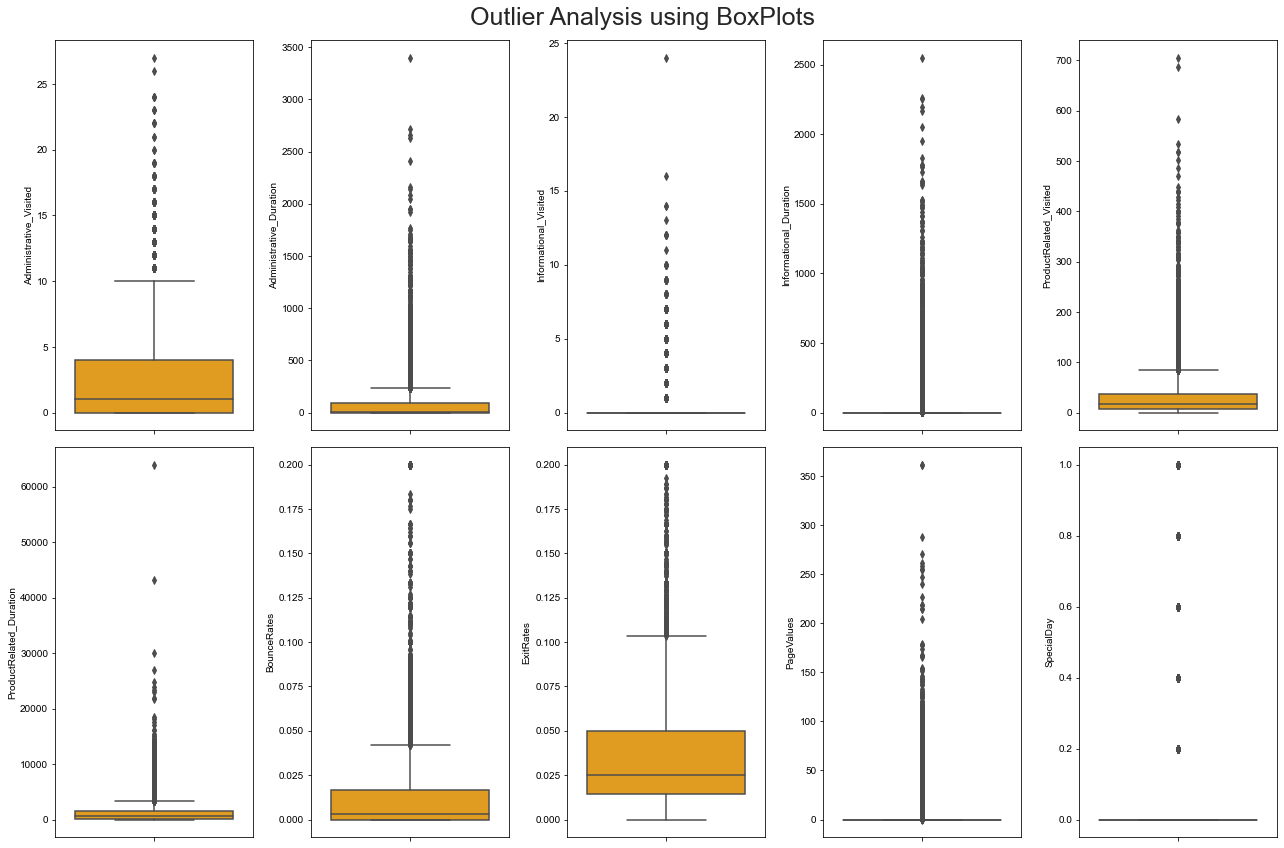

In [8]:
#Checking for outlier
#Using list comprehension
df_outlier = [col for col in df.columns if (df[col].dtype != 'object') & (df[col].dtype != 'bool')]

fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (18, 12))
ax = ax.flatten()
for i, c in enumerate(df_outlier):
    sns.boxplot(y=df[c],ax=ax[i],color='orange',dodge=False)
    sns.set_theme(style="whitegrid")
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25) 
fig.tight_layout()

### Observation:
Looking at the box plot above, there are no outliers in the datas set

# Creating new features

In [21]:
# Create average for the Duration and user_visits
df['Average_D'] = df[[col for col in df.columns if 'Duration' in col]].mean(axis=1)#calculating the average of  all the Duration pages
df['Average_user_visit'] = df[[col for col in df.columns if 'Visited' in col]].mean(axis=1)#calculating the average of  all the user_vited pages


In [22]:
# Confirming the addition of the 2 new features
df.columns

Index(['Administrative_Visited', 'Administrative_Duration',
       'Informational_Visited', 'Informational_Duration',
       'ProductRelated_Visited', 'ProductRelated_Duration', 'BounceRates',
       'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue',
       'Average_D', 'Average_user_visit'],
      dtype='object')

# Statistical Analysis

In [23]:
#Computing some statistical data
#Calculating average of Bounce rates, Exit rates,and page values
df["BounceRates"].mean()
df["ExitRates"].mean()
df["PageValues"].mean()
df["SpecialDay"].mean()
print(f'Average Bounce rates: {df["BounceRates"].mean()}\nAverage Exit rates: {df["ExitRates"].mean()}\nAverage Page Value: {df["PageValues"].mean()}\nAverage Special Day: {df["SpecialDay"].mean()}')


Average Bounce rates: 0.02219138047072182
Average Exit rates: 0.04307279776650446
Average Page Value: 5.889257862693592
Average Special Day: 0.061427412814274135


### Observations:
1. The percentage of Bounce rates is half of that of Exit rates. This implies that in most of the sessions users did not trigger actions after visiting any of the web page.
2. The Average Special Day is a non zero value. This means most of the visits were made closed to special days e.g Valentines's day.
3. We are not able to say much with the page value as the revenue in values are not specified in the data set

In [24]:
Avg_Duration=pd.DataFrame(df[[col for col in df.columns if ('Duration' in col)]].mean(), 
                           columns=['Average']).reset_index()

fig = px.bar(Avg_Duration,x='Average',y='index',labels=dict(index='Web pages',
                                        Average='Average duration'),title="The Average Duration spent on the each page")
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})

### Observations:
1. Much more time was spent on the Product Related page compare to the other 2 pages. This is due to the fact the users needed to read about the products. Also, making of transaction on the page may take some time.
2. The time spent on the Administrative page is more than double of the time spent on the information page.

In [25]:
#Calculating the amount spent in each pages
Avg_visit=pd.DataFrame(df[[col for col in df.columns if ('Visited' in col)]].mean(), 
                           columns=['Average']).reset_index()
fig = px.bar(Avg_visit,x='Average',y='index',labels=dict(index='Web pages',
                                        Average='Average'),title="Average no of visits of each page")
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})

### Observations:
1. The Product related page was much more visited compare to the other 2 pages.
2. No of visits to the informational page is only about 20% of the no of visits to the Administrative and less than 1% of the Product Related page

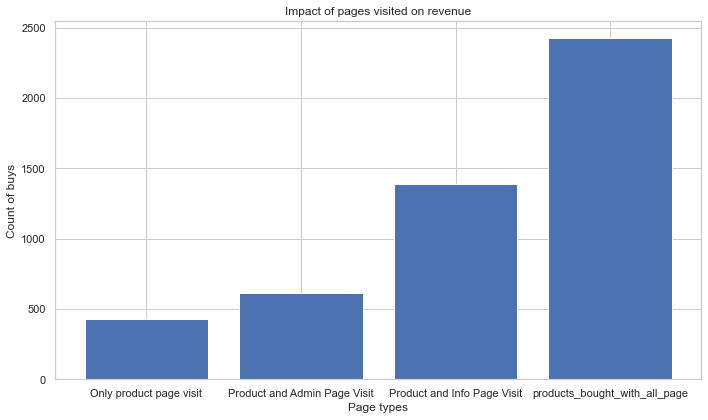

In [26]:
# User’s buying intention based on how he/she visits on other pages of the
# website (i.e Informative and Administrative).

 

product_bought_with_no_other_page = df[(df['Informational_Visited'] == 0) &
(df['Administrative_Visited'] == 0) & (df['ProductRelated_Visited'] != 0)  &
(df['Revenue']=="Buy")]

 

product_bought_info = df[(df['Informational_Visited'] != 0) & (df['ProductRelated_Visited'] != 0) &
(df['Revenue']=="Buy")]
product_bought_admin = df[(df['Administrative_Visited'] != 0) & (df['ProductRelated_Visited'] != 0) &
(df['Revenue']=="Buy")]
#products_bought_with_all_page = df[(df['Informational_Visited'] != 0) &
#(df['Administrative_Visited'] != 0) & (df['ProductRelated_Visited'] != 0) &
#(df['Revenue']=="Buy")]

 

products_bought_with_all_page= pd.concat([product_bought_with_no_other_page, product_bought_info,product_bought_admin])

 


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

 

#Products Revenue on visiting at admin page or info page in comparision to not
# visiting them.
pb_distri = ax.bar(["Only product page visit","Product and Admin Page Visit", "Product and Info Page Visit","products_bought_with_all_page"],
[len(product_bought_with_no_other_page.index),
len(product_bought_info.index),
len(product_bought_admin.index),
len(products_bought_with_all_page)],alpha=1.0,color='b')
ax.set(xlabel="Page types",
ylabel="Count of buys",
title="Impact of pages visited on revenue")
fig.tight_layout()
fig.savefig('user_page_visits')

### Observations:
1. The impact of pages visited on the revenue can be clearly seen from the chart. The more the type of page visited, the higher the buying frequency.
2. The no of buying when all the 3 pages were visited is 5 times that of when only the Product related page was visited.


# Visualisation and Analysis Insight

# Univariate Analysis
Visuliasation of the categorical variables

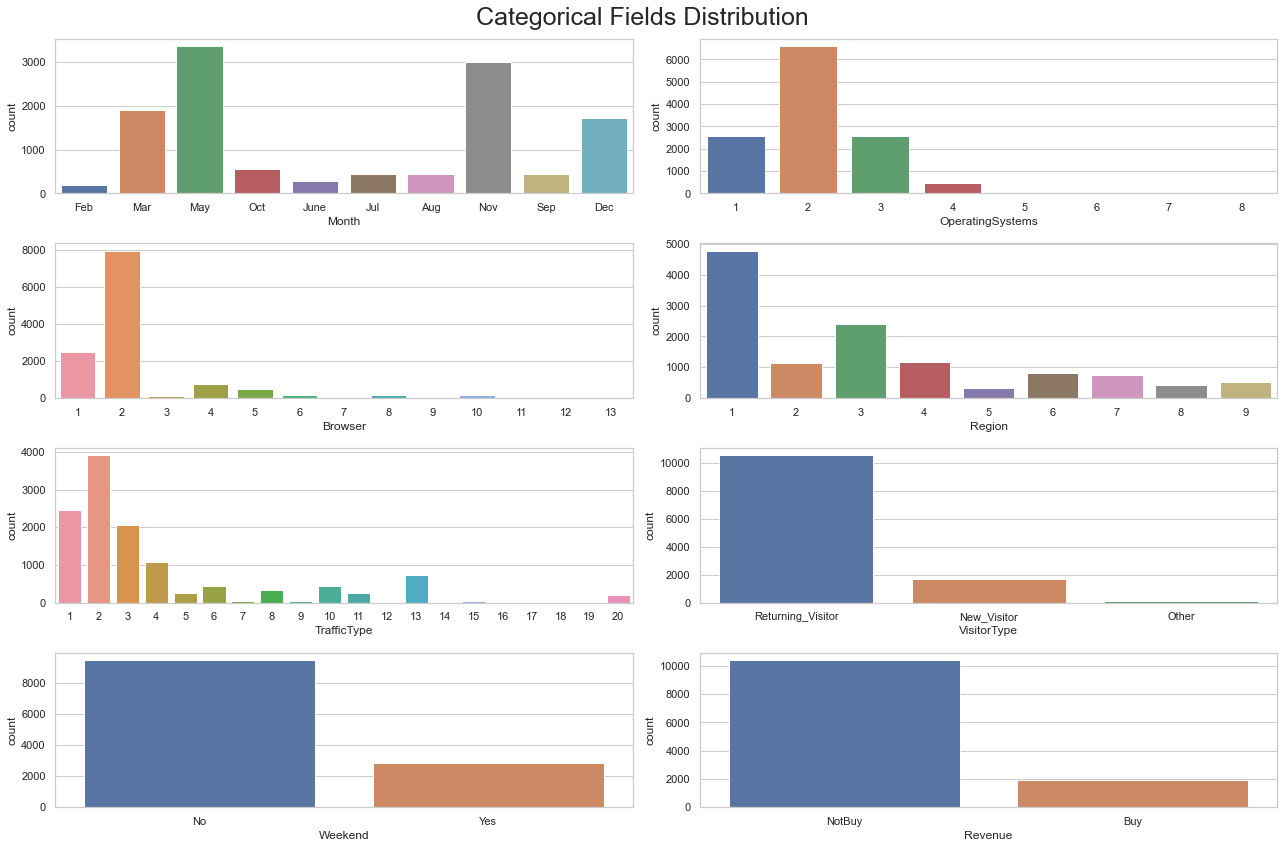

In [27]:
#Count Plots {Plots of categorical column and count}
check_unique_value = [col for col in df.columns if (df[col].dtype == 'object')]#remove the graph for operting_system,traffic_type,Browerser,Region
#Creating the rows and columns for the plot 
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (18, 12))
ax = ax.flatten()
for i, c in enumerate(check_unique_value ):
    sns.countplot(x=df[c],ax=ax[i])#y=check_unique_value,ax=ax[i]
    sns.set_theme(style="whitegrid")
plt.suptitle('Categorical Fields Distribution', fontsize = 25) 
fig.tight_layout()

### Observations:

1. The highest number of visits to the website was done in the of May while the lowest was in the month of Feb. Also most of the visits were made at the end of Q1,mid of Q2 and end of Q4 in the year.
2. The Operating_system '2' was mostly used by the users visiting the site.
3. Users from Region 1 visit online more compare to others.
4. Browser '2' was mostly used by the users visiting the site
5. About 90% of the visit was through traffic type '1' '2' and '3'
6. The number of visits made by the returning_visitors was 5 times more than the ones made by new visitors
7. Users visit more during the week than weekends
8. The buying hit rate with respect to number of sessions is about 15%. This means that only 15% of the total sessions led to buying.

# Bi_Variate Analysis

1.  Average_user_visits vs Revenue
2.  Average_user_visits vs Weekend
3.  Average_user_visits vs Month
4.  Avergae_user_visit vs Region
4.  Average_Duration vs Visitortype
5.  Each page visit duration vs Visitortype



## Average_User_Visits vs Revenue

In [28]:
groupped = df.groupby(by='Revenue',as_index=False).sum()
fig = px.bar(groupped,x='Revenue' ,y='Average_user_visit',orientation='v',color='Revenue',title="Average User visits vs Revenue")
fig.show()

### Observation:
About 25% of the total Average user visit(the 3 web pages) generated revenue. This implies hit rate of 25%

## Average_user_visits vs Weekend

In [29]:
groupped = df.groupby(by='Weekend',as_index=False).sum()
fig = px.bar(groupped,x='Weekend' ,y='Average_user_visit',orientation='v',color='Weekend',title="Average User visits vs weekend")
fig.show()

### Observation:
About 75% of the total Average user visit(the 3 web pages) were made during the weekdays while only 25% were made during weekends

## Average_user-visits vs Month

In [30]:
groupped = df.groupby(by='Month',as_index=False).sum()
fig = px.bar(groupped,x='Month' ,y='Average_user_visit',orientation='v',color='Month',title="Average_user_visit by month")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### Observations:
1. The highest number of visits were made in the month of Novemeber while the lowest was made in the month of Feb.
2. Quarter 2 and Quarter 4 appear to be the peak period of visits in the year.

## Average_user_visit vs Region

In [31]:
groupped = df.groupby(by='Region',as_index=False).sum()
fig = px.bar(groupped,x='Region' ,y='Average_user_visit',orientation='v',color='Region',title="Average_user_visit by Region")
#fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### Observations:
1. The highest number of visits was from Region 1, followed by Region 3 with about 50% of Region 1 visits
2. The lowest number of visits was from Region 5 which is about 5% of Region 1 visits.

## Average Duration vs Visitortype

In [32]:
# Plotting the chart of Average Duration(on the 3 pages) against the Visitortype
groupped = df.groupby(by='VisitorType',as_index=False).sum()
fig = px.bar(groupped,x='VisitorType' ,y='Average_D',orientation='v',color='VisitorType',title="Average time spent on each session by Visitortype")
fig.show()

## Observations:
1. The returning visitors spent more time on visiting the web pages
2. The new visitors spent less than 10% of the time spent by the returning visitors

## Each Page Visit Duration vs Visitortype

In [33]:
#Calculating the Average Duration on each page and grouping by Visitortype
VisitorDurationTable=pd.DataFrame(df,columns=["Informational_Duration","Administrative_Duration","ProductRelated_Duration","VisitorType"])
VisitorDurationTable.set_index("VisitorType").groupby("VisitorType").mean()


,Informational_Duration,Administrative_Duration,ProductRelated_Duration
VisitorType,,,
New_Visitor,19.237472,91.911315,636.393354
Other,11.685490,62.695588,570.404862
Returning_Visitor,37.101992,79.183639,1289.421490


In [34]:
#Calculating the sum of  Duration on each page and grouping by Visitortype
VisitorDurationTable.set_index("VisitorType").groupby("VisitorType").sum()

,Informational_Duration,Administrative_Duration,ProductRelated_Duration
VisitorType,,,
New_Visitor,32588.278334,155697.766959,1.078050e+06
Other,993.266667,5329.125000,4.848441e+04
Returning_Visitor,391463.121448,835466.575991,1.360469e+07


## Observations:
1. It can be seen that returning visitors spent  more time on the Informational and Product related page than the new visitors.
2. The new visitors spent more time on the Administrative page compare to the returning users. This may due to the fact user registration is required in the first visit.

# Multivariate Analysis
1. BounceRates vs ExitRates with Revenue
2. BounceRates vs Average_user_visit by Operating Systems
3. ProductRelated_Visited vs ProductRelated_Duration and Revenue
4. Average user visit vs Average Duration and Revenue

## BounceRates vs ExitRates with Revenue

In [35]:
fig = px.scatter(df,x= 'BounceRates',y='ExitRates',orientation ='v',color='Revenue', title="BounceRate vs ExitRates and Revenue")
fig.show()

### Observation:
More than 95% of the sessions resulted in buying when the Exit rates and Bounce rates are below 10% and 5% respectively. This implies that when the users trigger more actions after visiting any of the pages and they try to explore other pages after visiting one, they tend to buy.


## BounceRates vs Average_user_visit by Operating Systems

In [36]:
fig = px.scatter(df,x= 'BounceRates',y='Average_user_visit',orientation ='v',color='OperatingSystems', title="BounceRate vs Average_user_visit and Operating Systems")
fig.show()

### Observations:
1. More than 90% of the number of visits were made with users with Operating System 2 and 3
2. It can also be seen from the chart that the number of visits are high when the Bounce rates are low.
3. The number of visits with users on Operating System 2 are much higher than those of Operating System 3
4. Operating System 2 has relatively low bounce rate compare to Operating System 3

## ProductRelated_visit vs ProductRelated_Duration by Revenue

In [37]:
fig = px.scatter(df,x='ProductRelated_Duration',y='ProductRelated_Visited',orientation ='v',color='Revenue', title="ProductRelated_Visited vs ProductRelated_Duration and Revenue")
fig.show()

### Observation:
Most of the sessions where the user visited less number of Product related page and spent less time on that page, they bought. This implies that the most of the users that bought are quite familiar with the page and they just go for what they want.

In [38]:
fig = px.scatter(df,x='Average_D',y='Average_user_visit',orientation ='v',color='Revenue', title="Average user visit vs Average Duration and Revenue")
fig.show()

### Observation:
Most of the sessions where the user visited less number of pages and spent less time on a session, they bought. This implies that the most of the users that bought are quite familiar with the site and they just go for what they want.


## Data Processing for Machine Learning

In [43]:
data= pd.read_csv("online_shoppers_intention.csv")

In [44]:
# one hot encoding

datadum = pd.get_dummies(data)

datadum.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [45]:
# label encoding of revenue
le = LabelEncoder()
datadum['Revenue'] = le.fit_transform(datadum['Revenue'])
datadum['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [46]:
# getting dependent and independent variables
x = datadum
y = datadum['Revenue']
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 29)
Shape of y: (12330,)


In [47]:
# Method to evaluate the model and create a classification report and a confusion matrix
# Method to split data into for Training and Testing.

def split_data(datadum, testSize, className = 'Revenue'):
 x = datadum.drop([className], axis=1)
 y = datadum[className]
  
 return train_test_split(x, y, test_size=testSize, random_state=0)
def evaluate_model(y_test, y_pred):
    
# classification report
 cr = classification_report(y_test, y_pred)
 print('Classification Report :')
 print(cr)
  
 # confusion matrix
 cm = confusion_matrix(y_test, y_pred)
 print('Confusion Matrix :')
  
 plt.rcParams['figure.figsize'] = (6, 6)
 sns.heatmap(cm ,annot = True)

In [48]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 29)
Shape of y_train : (8631,)
Shape of x_test : (3699, 29)
Shape of y_test : (3699,)


In [49]:
# standard scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [50]:
# feature extraction
pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## 1. Logistic Regression Model

Training Accuracy : 1.0
Testing Accuracy : 1.0
Accuracy :  1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      1.00      1.00       622

    accuracy                           1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699

Confusion Matrix :
          y_test_0  y_test_1
y_pred_0      3077         0
y_pred_1         0       622


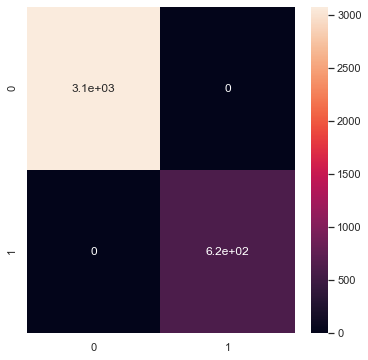

In [51]:
model = LogisticRegression()
# Training the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

LR = accuracy_score(y_test, y_pred)
print('Accuracy : ', LR)
evaluate_model(y_test, y_pred)
cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_pred)
print(cf)

## 2. Gradient Boosting

Training Accuracy : 1.0
Testing Accuracy : 0.9983779399837794
Accuracy :  0.9983779399837794
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      0.99      1.00       622

    accuracy                           1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699

Confusion Matrix :
          y_test_0  y_test_1
y_pred_0      3075         2
y_pred_1         4       618


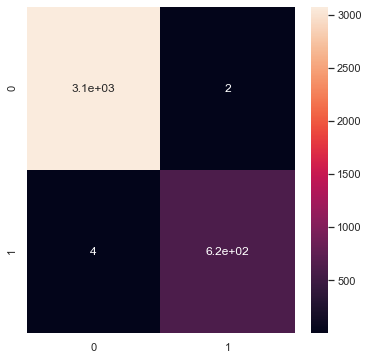

In [52]:
# Gradient Boosting with split data
model = GradientBoostingClassifier()
# Training the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

GB = accuracy_score(y_test, y_pred)
print('Accuracy : ', GB)
evaluate_model(y_test, y_pred)
cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_pred)
print(cf)

## 3. Decision Tree

Training Accuracy : 1.0
Testing Accuracy : 0.9932414165990808
Accuracy :  0.9932414165990808
Classification Report :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3077
           1       0.99      0.97      0.98       622

    accuracy                           0.99      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       0.99      0.99      0.99      3699

Confusion Matrix :
          y_test_0  y_test_1
y_pred_0      3068         9
y_pred_1        16       606


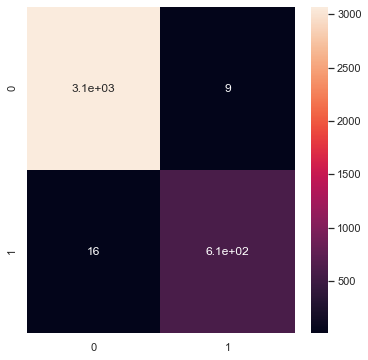

In [53]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

 

y_pred = model.predict(x_test)

 

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

 

DT = accuracy_score(y_test, y_pred)
print('Accuracy : ', DT)
evaluate_model(y_test, y_pred)



cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_pred)
print(cf)

## 4. Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.9981075966477426
Accuracy :  0.9981075966477426
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       0.99      1.00      0.99       622

    accuracy                           1.00      3699
   macro avg       0.99      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699

Confusion Matrix :
          y_test_0  y_test_1
y_pred_0      3070         7
y_pred_1         0       622


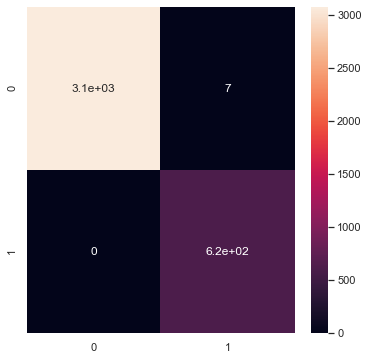

In [54]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

 

y_pred = model.predict(x_test)

 

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

 

RF = accuracy_score(y_test, y_pred)
print('Accuracy : ', RF)
evaluate_model(y_test, y_pred)


cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_pred)
print(cf)

## 5. Support Vector Machine

Training Accuracy : 1.0
Testing Accuracy : 0.9978372533117059
Accuracy :  0.9978372533117059
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      0.99      0.99       622

    accuracy                           1.00      3699
   macro avg       1.00      0.99      1.00      3699
weighted avg       1.00      1.00      1.00      3699

Confusion Matrix :
          y_test_0  y_test_1
y_pred_0      3077         0
y_pred_1         8       614


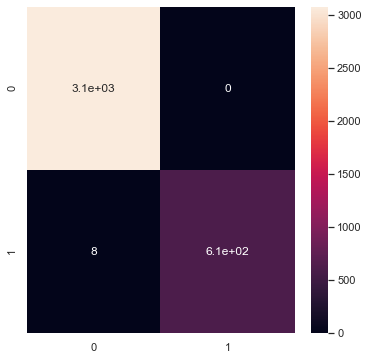

In [55]:

model = SVC(probability=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


SV = accuracy_score(y_test, y_pred)
print('Accuracy : ', SV)
evaluate_model(y_test, y_pred)


cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_pred)
print(cf)

## Model Comparison Summary

In [56]:
#Models Accuracies
Accuracies = [round(LR.mean()*100,2),
              round(GB.mean()*100,2),
              round(DT.mean()*100,2),
              round(RF.mean()*100,2),
              round(SV.mean()*100,2),
              ]

In [57]:
Classifiers = ["Logistic Regression","Gradient Boosting","Decision Tree","Random Forest","Support Vector Machine"]
df = pd.DataFrame(list(zip(Classifiers, Accuracies)), columns = ["Model", "Accuracy"])

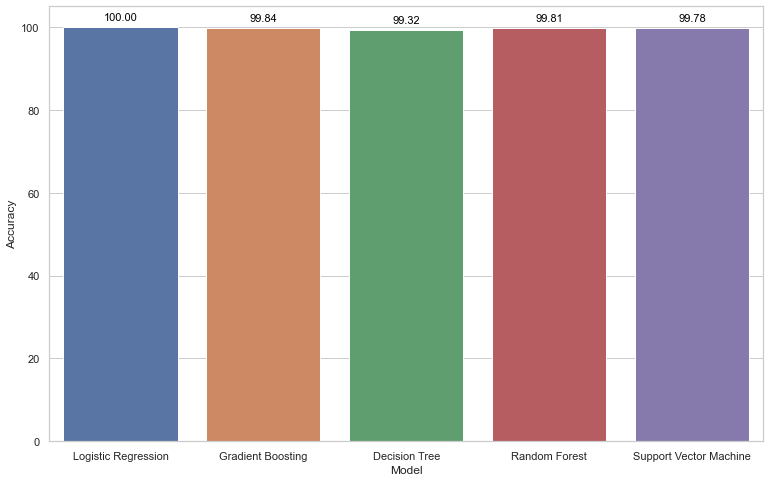

In [58]:
fig,ax = plt.subplots()
fig.set_size_inches(16,8)

#to get different colors for each of the variable assign the variable to hue
g=sns.barplot(x='Model',y='Accuracy',data=df,ax=ax)

#Code for to put legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adding respective values to the top of each bar
for p in ax.patches: 
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                textcoords='offset points')
#To save the plot as 'SO.png'    
plt.savefig('SO.png',dpi=100,bbox_inches='tight')
plt.show()

# Recommendation and Conclusion

## Recommendations based on Statistical Analysis results

1. Result shows that the more types of page visited, the higher the tendency of buying. The 'Impact of page visit on Revenue' chart shows that the number of 'buys' when the users visit all the 3 pages is 5 times higher than that of 'buys' when only Product Related page was visited.
There is a need to improve on the website design and content to ensure that users are encouraged to visit the Informational, Administrative and Product Related pages.


2. It can be seen from the result that about 25% of the number visits resulted in buying.
The revenue can be increased by launching marketing campaign to increase awareness and therefore increase traffic to the site.
Revenue can also be increased by increasing the hit rate which can be achieved making prices of products attractive via special offers and promotions.


3. The analysis of Bounce rates, Exit rates and Revenue clearly shows that higher number of 'buys' were recorded where Bounce rates and Exit Rates are low. It can also been see that about 95% of the users are using Operating System 2 and 3. Much higher bounce rates were recorded for Operating System 3 compare to Operating System 2.
There is a need to ensure that the website is fully compatible with Operating System 3 to reduce the Bounce rates


4. Result shows that more than 85% of the total visits were made in Q2(May) and Q4(Nov & Dec).
Marketing campaign and other promotional activities should be launched in Q1 and Q3.


5. About 95% of the visits were made from Regions 1,2,3,4 while remaining 5% were spread over the remaining 5 regions.
 Marketing activities should increased in those regions with less number of visits.
 
 